## Environment Setting

In [1]:
# External API
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np

# Part of External API
from operator import itemgetter
from pandas import Series, DataFrame
import pandas as pd

# Own code API
import TextminingPlsa
from stopwords import stopwords

## Load Data Set

In [2]:
df = pd.read_csv('./data/pre_review.csv', encoding='cp949') # orginal pre_review.csv, samplind pre_review3.csv
print(df.shape)
df.head()

(336456, 2)


,Unnamed: 0,reveiw
0,0,interesting
1,1,first
2,2,weeks
3,3,echo
4,4,happy


In [3]:
df = df.drop(df.columns[0], axis = 1)
print(df.shape)

(336456, 1)


## Implementation of pLSA

In [4]:
corpus = TextminingPlsa.Corpus()

In [5]:
preList = df[df.columns[0]].values.tolist()
print(len(preList))

336456


In [6]:
len(stopwords)

605

In [7]:
stopPreList = [word for word in preList if word not in stopwords]
print(len(preList))

336456


In [8]:
corpus.add_document(stopPreList)

In [9]:
voca = corpus.build_vocabulary()
print(len(voca))

11687


In [10]:
def visualization_likelihod(value_list):
    plt.plot(value_list, c="b", lw=2, ls="--", marker="o", ms=5, mec="g", mew=2, mfc="r")

    plt.xlabel('$Iteration$', fontsize=14)
    plt.title('Log-Likelihood for Optimization', fontsize=20)
    plt.ylabel('$Value$', fontsize=14)
    plt.tight_layout()
    plt.show()

In [11]:
result = corpus.plsa(number_of_topics=3, max_iter=100, lambda_b=0.7) # all data set:0.6
print(result[2].shape, result[3].shape)

EM iteration begins...
Initializing...
Iteration #1...
Iteration #2...
Iteration #3...
Iteration #4...
Iteration #5...
Iteration #6...
Iteration #7...
Iteration #8...
Iteration #9...
Iteration #10...
Iteration #11...
Iteration #12...
Iteration #13...
Iteration #14...
Iteration #15...
Iteration #16...
Iteration #17...
Iteration #18...
Iteration #19...
Iteration #20...
Iteration #21...
Iteration #22...
Iteration #23...
Iteration #24...
Iteration #25...
Iteration #26...
Iteration #27...
Iteration #28...
Iteration #29...
Iteration #30...
Iteration #31...
Iteration #32...
Iteration #33...
(3, 11687) (1, 3)


In [12]:
result[0]

0.7

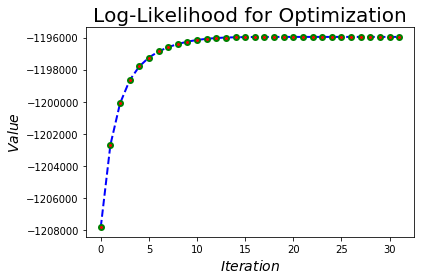

In [13]:
visualization_likelihod(result[1])

In [14]:
topic_word_list = []
for row in range(result[2].shape[0]):
    for col in range(result[2].shape[1]):
        topic_word_list.append((voca[col], result[2][row][col]))

print(len(topic_word_list), topic_word_list)

35061 [(nan, 7.9725672404590947e-06), ('hip', 2.2372294487340982e-05), ('encyclopedia', 4.3414167032038179e-05), ('carpeted', 7.1143327052840027e-06), ('boys', 2.4836857215374544e-05), ('login', 3.6730574977958328e-05), ('personable', 3.5006047224947494e-06), ('winner', 7.7183607221258433e-05), ('detroit', 6.6984666166073052e-06), ('modify', 6.0019610731250898e-06), ('label', 2.9803267485901185e-05), ('enought', 7.3458882651837227e-06), ('aniyway', 7.7151396923139786e-06), ('fingertips', 2.5030929065939523e-05), ('kindles', 6.2218453920740355e-06), ('shorties', 1.1650519918863767e-05), ('alexaone', 6.7972789248536444e-06), ('preserved', 5.2104948220947453e-06), ('clock', 0.00063535275488997708), ('emotion', 6.8356915471181734e-06), ('glossy', 7.3961561912144954e-06), ('localized', 7.7633552028995253e-06), ('sirius', 0.00036473337893718773), ('hipaa', 6.7282134478727306e-06), ('modest', 2.0636864514503777e-05), ('suit', 5.2025526964645806e-05), ('claiming', 5.3910336894583501e-06), ('da

In [15]:
topic1 = topic_word_list[:1*len(voca)]
topic2 = topic_word_list[1*len(voca):2*len(voca)]
topic3 = topic_word_list[2*len(voca):3*len(voca)]
#topic4 = topic_word_list[3*len(voca):4*len(voca)]

In [16]:
topic1= sorted(topic1, key=itemgetter(1), reverse=True)
topic1_word = [wordFreq[0] for wordFreq in topic1]
topic2 =sorted(topic2, key=itemgetter(1), reverse=True)
topic2_word = [wordFreq[0] for wordFreq in topic2]
topic3 =sorted(topic3, key=itemgetter(1), reverse=True)
topic3_word = [wordFreq[0] for wordFreq in topic3]
#topic4 =sorted(topic4, key=itemgetter(1), reverse=True)
#topic4_word = [wordFreq[0] for wordFreq in topic4]

In [17]:
making_data = {
    'Topic1': [topic1_word[0], topic1_word[1], topic1_word[2], topic1_word[3], topic1_word[4]],
    'Topic2': [topic2_word[0], topic2_word[1], topic2_word[2], topic2_word[3], topic2_word[4]],
    'Topic3': [topic3_word[0], topic3_word[1], topic3_word[2], topic3_word[3], topic3_word[4]],
    #'Topic4': [topic4_word[0], topic4_word[1], topic4_word[2], topic4_word[3], topic4_word[4]]
}

In [18]:
result_data = DataFrame(making_data)
print(result_data)

    Topic1   Topic2    Topic3
0     echo  quality      echo
1   amazon     echo    listen
2  quality   listen   control
3     home   amazon    amazon
4     room      try  shopping


In [19]:
df1 = pd.DataFrame(topic1[:30])
df2 = pd.DataFrame(topic2[:30])
df3 = pd.DataFrame(topic3[:30])
#df4 = pd.DataFrame(topic4[:30])

In [20]:
resultTable = pd.concat([df1,df2,df3], axis=1)
resultTable

,0,1,0,1,0,1
0,echo,0.056956,quality,0.030332,echo,0.029235
1,amazon,0.016612,echo,0.027263,listen,0.023844
2,quality,0.011703,listen,0.016046,control,0.015526
3,home,0.011677,amazon,0.011848,amazon,0.012583
4,room,0.008026,try,0.011815,shopping,0.012080
5,app,0.005262,listening,0.011729,family,0.010360
6,volume,0.005120,house,0.010767,service,0.009654
7,purchase,0.004880,family,0.009770,connect,0.009377
8,house,0.004825,tv,0.008938,news,0.008793
9,list,0.004577,room,0.008087,quality,0.008686


In [21]:
resultTable.to_csv('./result/topic_modeling_result_amazon.csv')